# Drowsiness Detection

#### Tools Used:
##### 1. yolov5
###### YOLO (You Only Look Once) is a popular object detection algorithm that has revolutionized the field of computer vision. It is fast and efficient, making it an excellent choice for real-time object detection tasks.
##### 2. Open CV
###### OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV is a great tool for image processing and performing computer vision tasks. It is an open-source library that can be used to perform tasks like face detection, objection tracking, landmark detection, and much more.
##### 3. labelImage
###### LabelImg is a graphical image annotation tool. It is written in Python and uses Qt for its graphical interface.
##### 4. Pytorch
###### PyTorch is a machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing

### Cloning Repositeries and Downloading dependencies

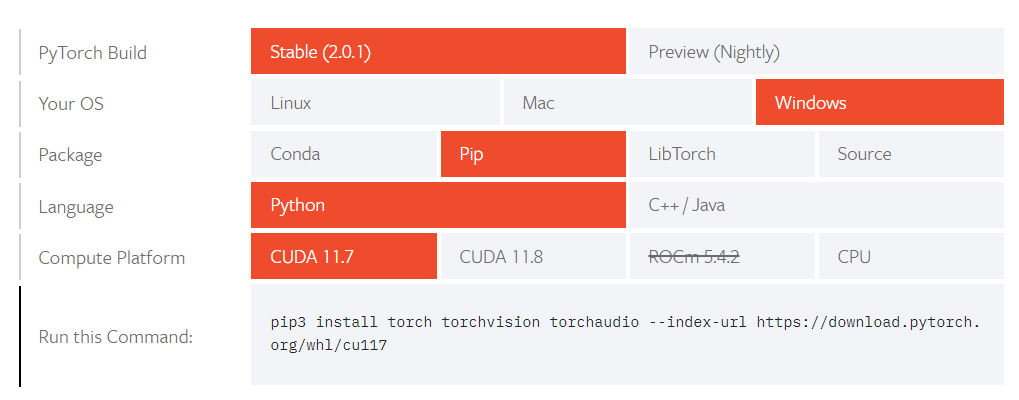

In [1]:
# Installing Pytorch for CUDA 11.8. The corresponding command can be copied from 'https://pytorch.org/get-started/locally/'
# according to your CUDA version. If you want to use your CPU instead of GPU then select CPU on the download page. 

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
# Cloning the yolov5 repository from github
# Has to be done in your root folder, where the jupyter notebook is present.

!git clone https://github.com/ultralytics/yolov5

In [3]:
# installing requirements for yolov5

!cd yolov5 & pip install -r requirements.txt

In [ ]:
# Cloning the labelimage repository from github

!git clone https://github.com/tzutalin/labelImg

In [4]:
# installing PyQt5 and installing the resources.qrc file in labelimage
# This tool is used to label the collected images.

!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [1]:
# importing required modules 

import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import uuid
import os
import time

# Checking the yolov5 model

In [3]:
# test image path

img='test_image.jpg'

In [12]:
# loading model yolov5s

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [5]:
results = model(img)

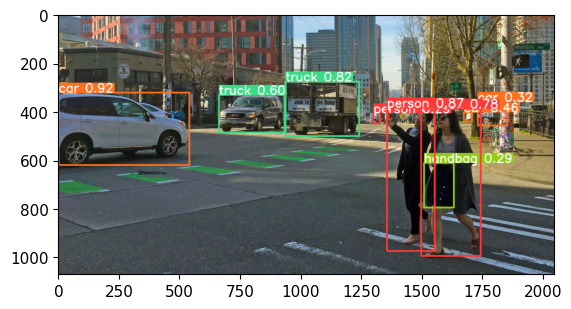

In [6]:
# showing result image with labels

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# Real Time Detection using machine camera

# accesing the machine webcam
cap = cv2.VideoCapture(0)

# checking if the webcam is open or not
while cap.isOpened():

    # gives a return value and a frame (captured image)
    ret, frame = cap.read()
    
    # Make detections using the model
    results = model(frame)

    # showing the results for each frame
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # if 'q' key is pressed loop breaks
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# release the machine webcam
cap.release()

# destroy all opened windows
cv2.destroyAllWindows()

### Results of real time detection
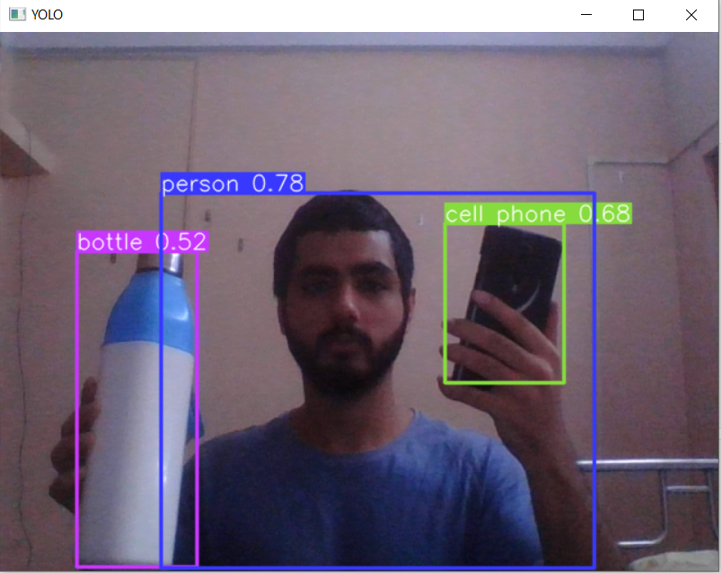

##### Comments
###### The yolov5s is detecting objects quite well

# Training the drowsiness detection model

In [ ]:
# create a folder called 'data' in the root directory. Inside data folder create a folder named 'images'

# Path where images are stored
images_path=os.path.join('data','images')

# Making a list of labels
labels=['awake','drowsy']

# defining number of images for each label
num_images=25

#### Capturing images for training data

In [ ]:
# Used to capture images of awake and drowsy persons to train the model on or custom dataset

# accesing the machine webcam
cap=cv2.VideoCapture(0)

# loop for capturing each label images
for label in labels:
    print(f'Collecting images for {label}')

    # 5 second gap between image capture of different labels 
    time.sleep(5)
    
    # loop for capturing 25 images of each label
    for image in range(num_images):

        # printing which image number and label for the image being captured
        print(f'Collecting images for {label}, image number {image}')

        # gives a return value and a frame (captured image)
        ret, frame=cap.read()

        # gives a path with unique name to each image  using uuid 
        image_name=os.path.join(images_path,label + '.'+str(uuid.uuid1())+'.jpg')

        # writing the image in the path and with unique name stored in image_name
        cv2.imwrite(image_name,frame)

        # showing the captured image
        cv2.imshow('Image Collection',frame)

        # adding a 2 second gap between the capture of each image
        time.sleep(2)

        # if 'q' key is pressed loop breaks
        if cv2.waitKey(10) & 0xff==ord('q'):
            break

# release the machine webcam
cap.release()

# destroy all opened windows
cv2.destroyAllWindows()

#### Labelling images as 'awake' and 'drowsy' using labelimage
##### 1. Go to your root directory(where ) then labelimage folder
##### 2. Open command prompt in the labelimage folder and write the command 'python lableImg.py'
##### 3. A window will pop up where we can label images manually.
#### Awake label
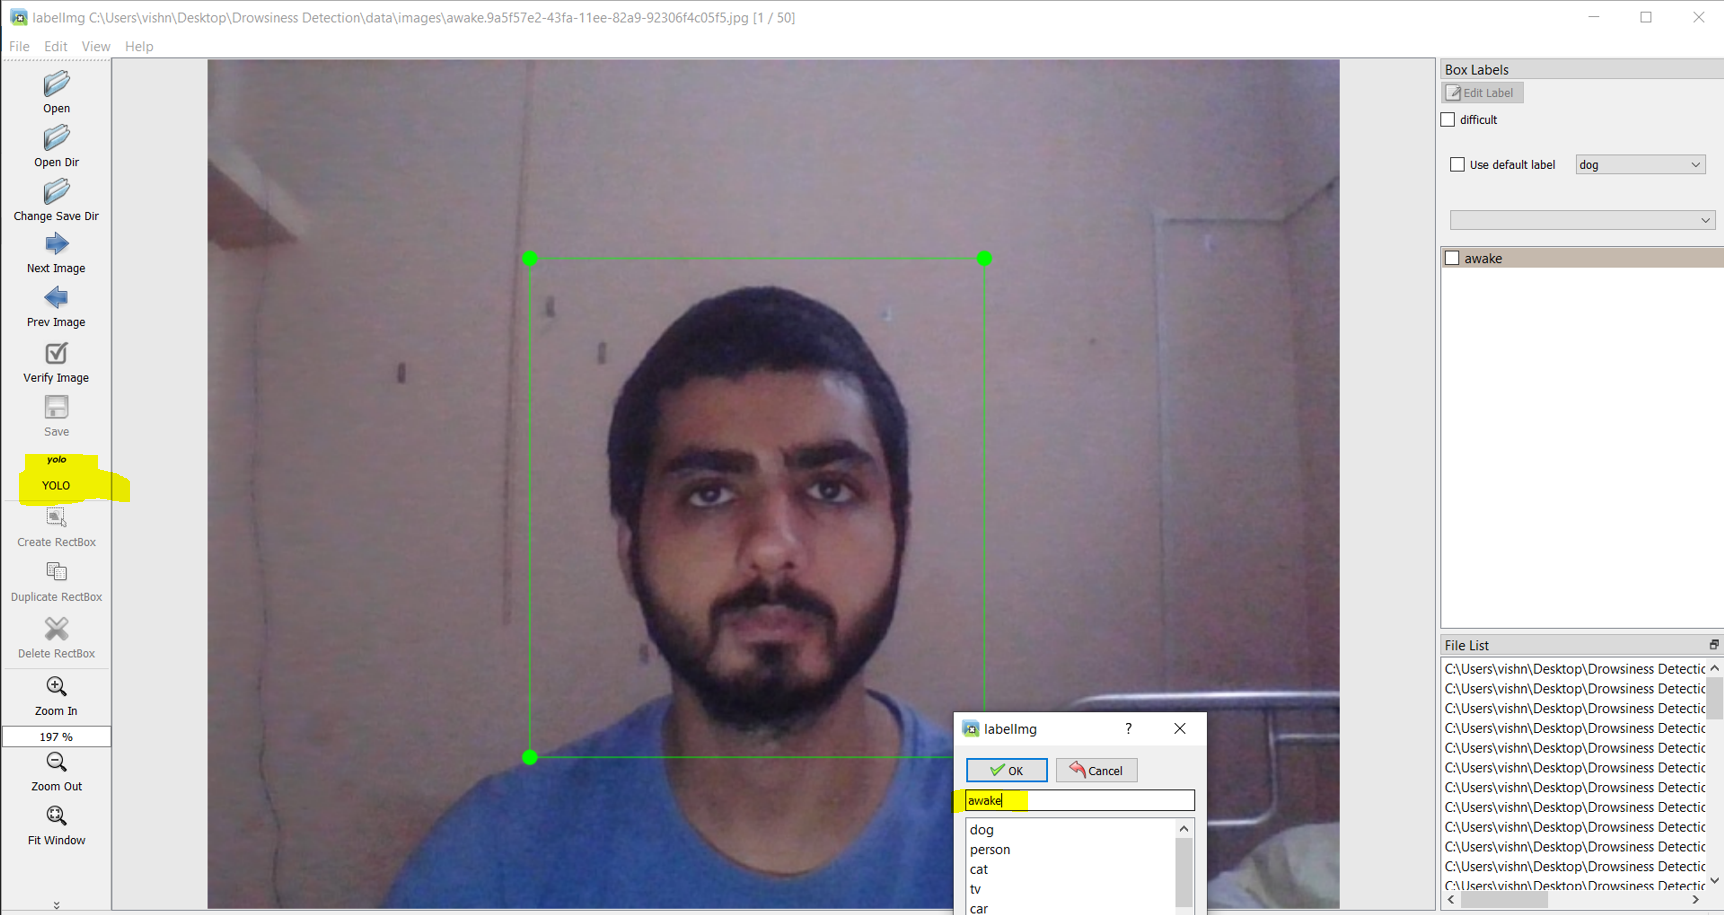

#### Drowsy label
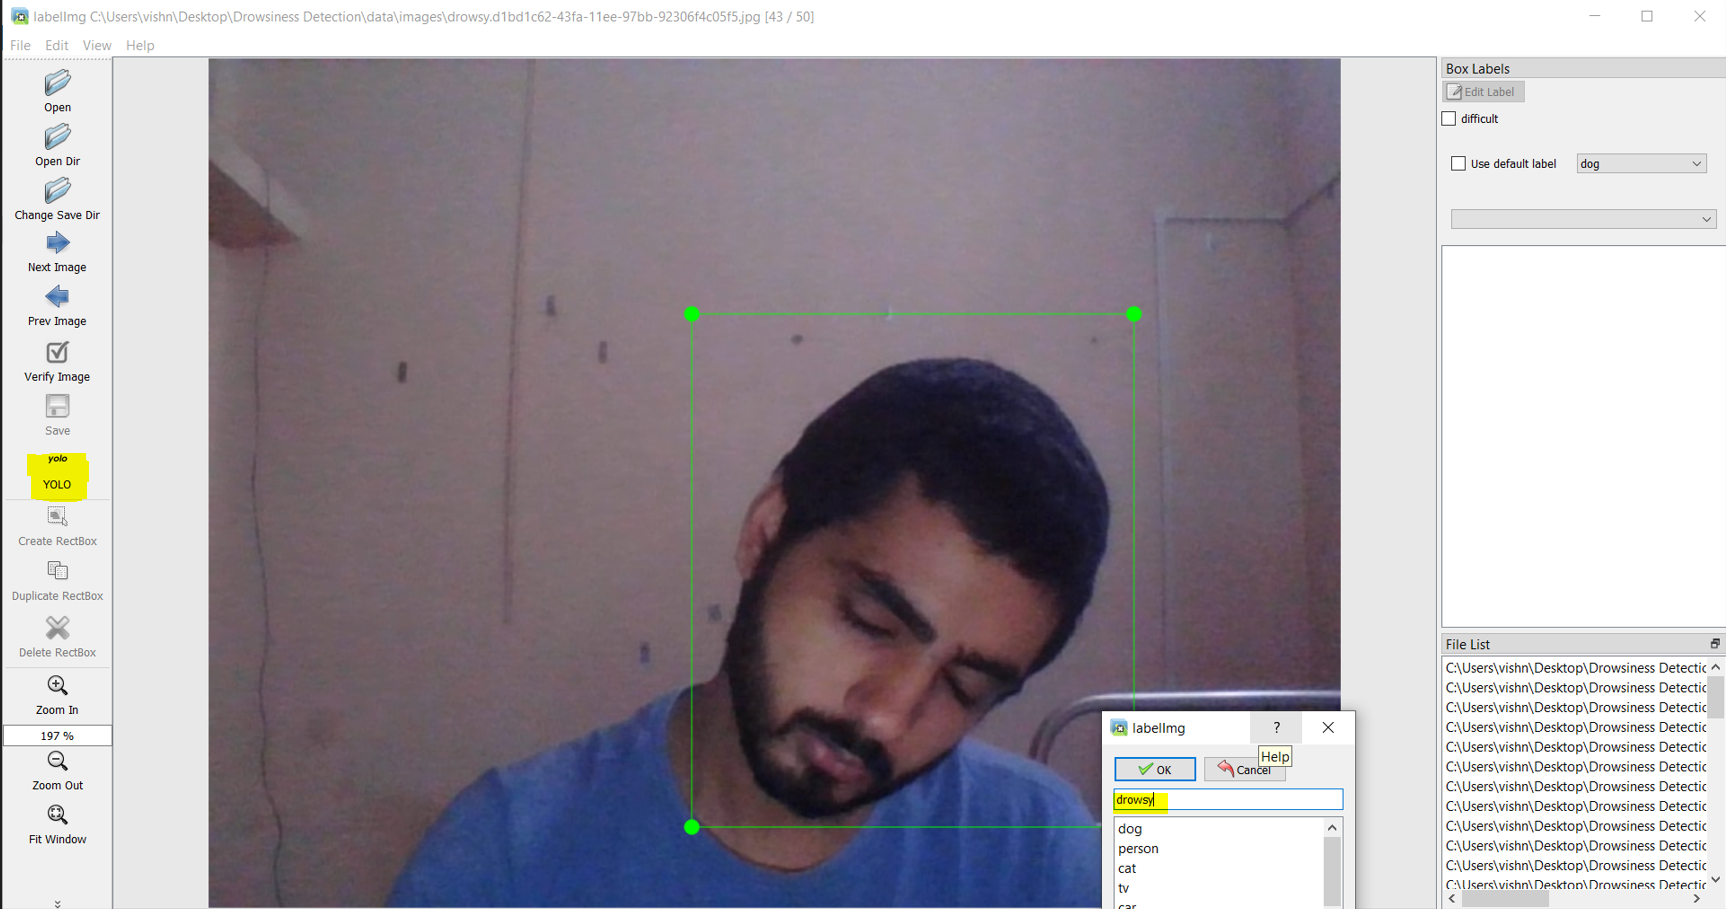
##### 4. Label all the captured images.
##### 5. Save the labelled images in a new folder inside the data folder named as labels.
##### 6. See to it that you are saving in yolo mode (highlighted in the above images)


### Training the model on our custom dataset
#### Before training the data a file called dataset.yaml has to be created inside the yolov5 folder for custom dataset creation
#### Check the below documentation at 'https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#13-prepare-dataset-for-yolov5'
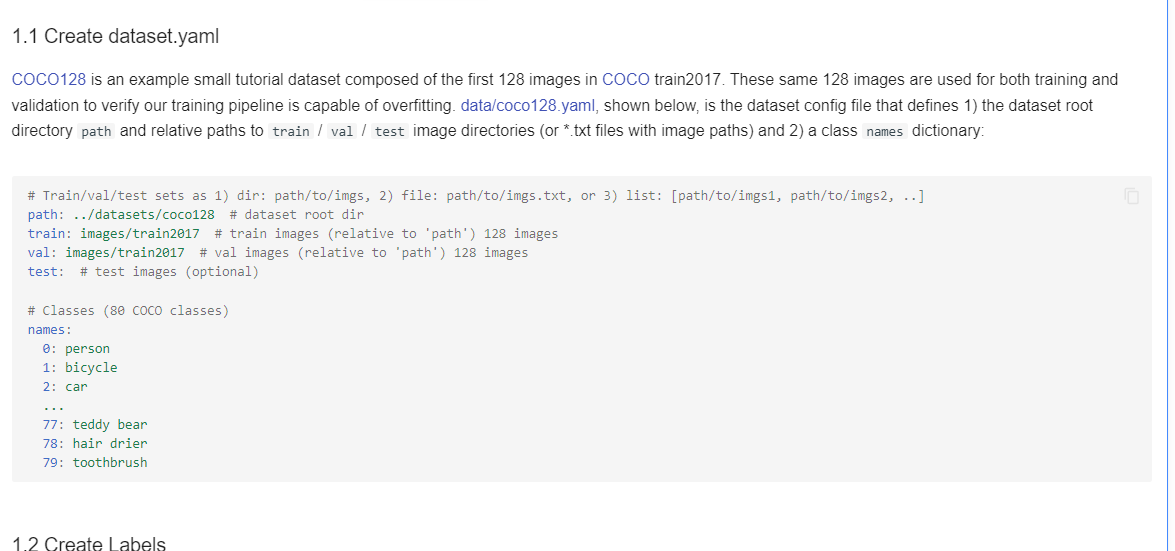

### Training the final model

In [ ]:
# training the model using custom dataset
# epoch - An epoch in machine learning means one complete pass of the training dataset through the algorithm. 
# img - image size
# batch- Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.

# All these parameters can be changed according the performance of your GPU and CPU. 

!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

In [6]:
# loading the trained model
# the model results are stored in the root directory in 'yolov5/runs/train/exp/weights/last.pt'

model=torch.hub.load(repo_or_dir='yolov5',model='custom',path='yolov5/runs/train/exp/weights/last.pt', force_reload=True,source='local')

YOLOv5  2023-8-25 Python-3.11.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
# loading test image

img = os.path.join('data', 'images', 'awake.9a5f57e2-43fa-11ee-82a9-92306f4c05f5.jpg')

In [9]:
# storing result
results = model(img)

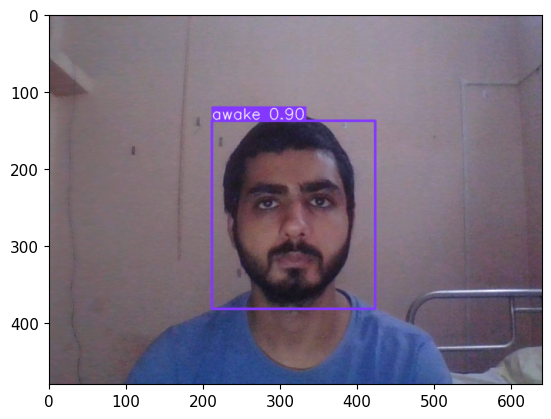

In [10]:
# showing result image with label
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
# loading test image

img = os.path.join('data', 'images', 'drowsy.c321c5a0-43fa-11ee-95df-92306f4c05f5.jpg')

In [12]:
# storing result

results = model(img)

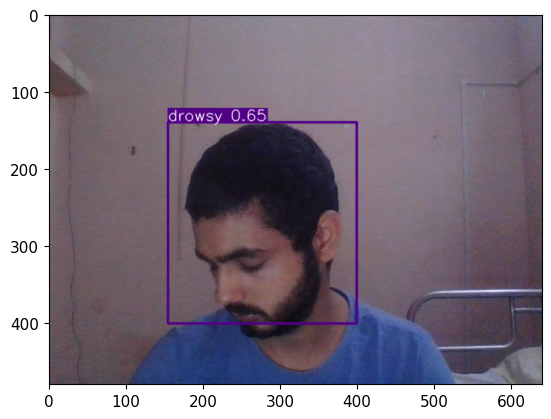

In [13]:
# showing result image with label

%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
# Realtime Detection  using opencv

# accesing the machine webcam
cap = cv2.VideoCapture(0)

# checking if the webcam is open or not
while cap.isOpened():

    # gives a return value and a frame (captured image)
    ret, frame = cap.read()
    
    # Make detections using model
    results = model(frame)

    # showing the results for each frame
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # if 'q' key is pressed loop breaks
    key = cv2.waitKey(10)
    if key == ord('q') or key == 27:  # 'q' key or Esc key
        break
        # if window is closed, exit the loop
    if cv2.getWindowProperty('YOLO', cv2.WND_PROP_VISIBLE) < 1:
        break
# release the machine webcam   
cap.release()

# destroy all opened windows
cv2.destroyAllWindows()